## Analysis of SZ Lyn 2019 observations 

Import packages and functions:

In [1]:
import numpy as np
import scipy.fftpack
from functions import *

Create master bias:

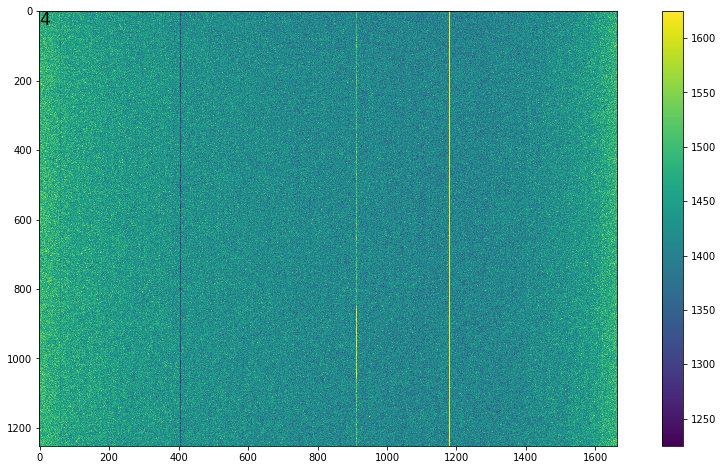

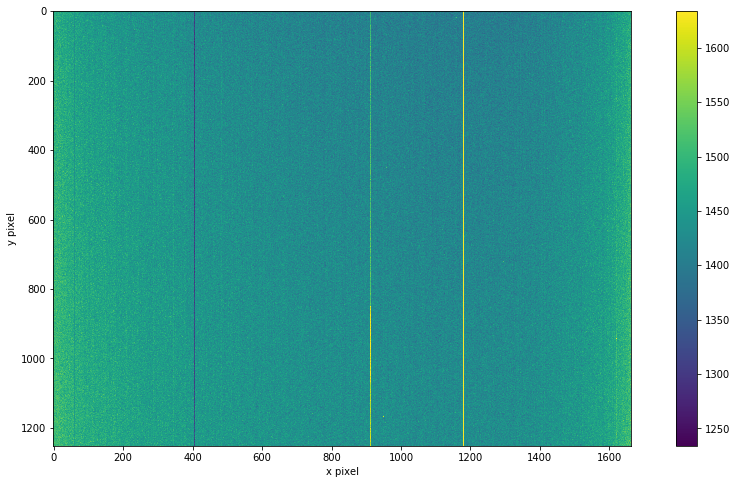

In [12]:
bias = np.array([get_data('/Users/guido/Dropbox/lectures/2019/bias_2x2/bias_%i.fit' % i) for i in range(1,6)])
mbias = np.mean(bias, axis=0)

plot_sequence(bias, plot_medrange)
plot_medrange(mbias)
plt.show()

Estimate the read-out noise:

RON from individual bias frames: [19.207 20.299 19.737 19.684 19.507]
RON from master bias: 19.878


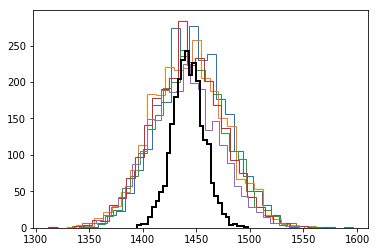

In [3]:
bias_slice = np.s_[250:300, 250:300]

bias_reg = np.array([b[bias_slice] for b in bias])
mbias_reg = mbias[bias_slice]
bias_std = np.array([np.std(b) for b in bias_reg])
mbias_std = np.std(mbias_reg)

for b in bias_reg:
    plt.hist(np.ravel(b), bins=30, histtype='step')
plt.hist(np.ravel(mbias_reg), bins=30, histtype='step', color='black', linewidth=2)

gain = 0.6  # e-/counts
ron_bias = bias_std*gain
ron_mbias = mbias_std*gain*np.sqrt(len(ron_bias))
np.set_printoptions(precision=3)
print("RON from individual bias frames:", ron_bias)
print("RON from master bias: %3.3f" % ron_mbias)

Create master flats:

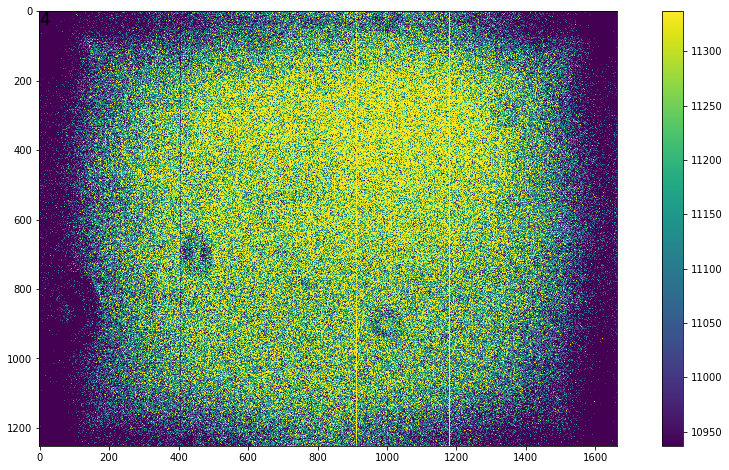

In [4]:
flat_B = np.array([get_data('/Users/guido/Dropbox/lectures/2019/flat_2x2/flat_B_%i.fit' % i) for i in range(1,6)])
flat_med_B = np.median(flat_B-mbias, axis=0)
mflat_B = flat_med_B/np.mean(flat_med_B)

flat_R = np.array([get_data('/Users/guido/Dropbox/lectures/2019/flat_2x2/flat_R_%i.fit' % i) for i in range(1,6)])
flat_med_R = np.median(flat_R-mbias, axis=0)
mflat_R = flat_med_R/np.mean(flat_med_R)

plot_sequence(flat_B, plot_medrange)
plot_sequence(flat_R, plot_medrange)

Compute circular photometry:

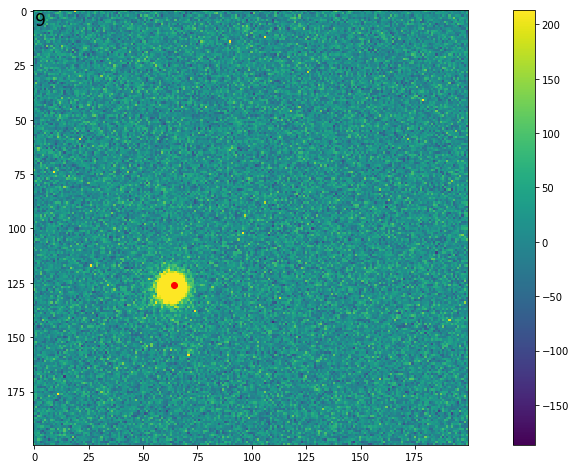

In [5]:
i_range = range(1,250)  # Range for processing: as in frame names
p_range = range(10)  # Range for plotting: referred to positions in i_range

jd_B = np.array([get_header('/Users/guido/Dropbox/lectures/2019/SZ_Lyn_2019/SZ_Lyn-0%03iB.fit' % i)['JD-HELIO'] for i in i_range])
jd_R = np.array([get_header('/Users/guido/Dropbox/lectures/2019/SZ_Lyn_2019/SZ_Lyn-0%03iR.fit' % i)['JD-HELIO'] for i in i_range])

sci_names_B = np.array(['/Users/guido/Dropbox/lectures/2019/SZ_Lyn_2019/SZ_Lyn-0%03iB.fit' % i for i in i_range])
sci_names_R = np.array(['/Users/guido/Dropbox/lectures/2019/SZ_Lyn_2019/SZ_Lyn-0%03iR.fit' % i for i in i_range])

sz_lyn_xy = (720,700)
sz_lyn_width = 200
sz_lyn_s_B, sz_lyn_n_B = phot_circ(sci_names_B, mbias, mflat_B, sz_lyn_xy, sz_lyn_width, p_range)
sz_lyn_s_R, sz_lyn_n_R = phot_circ(sci_names_R, mbias, mflat_R, sz_lyn_xy, sz_lyn_width, p_range)

40.0
30.0
20.0
10.0
9.0
9.0
9.0
9.0
9.0
9.0


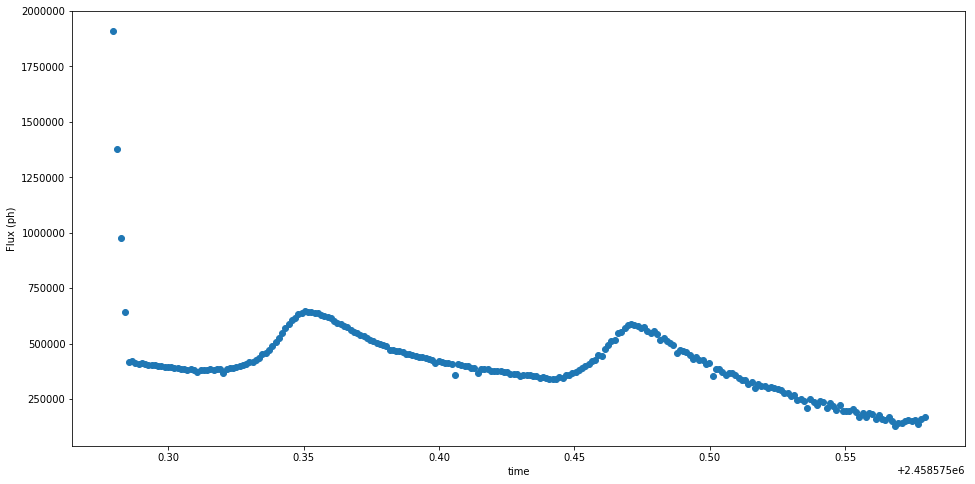

In [6]:
for s in sci_names_R[:10]:
    s_hdr = get_header(s)
    print(s_hdr['EXPTIME'])

plot_time_series(jd_B, sz_lyn_s_B)

Flux-calibrate with BJR 416:

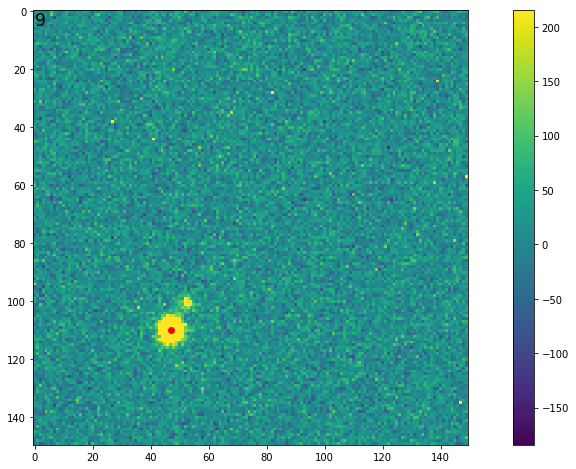

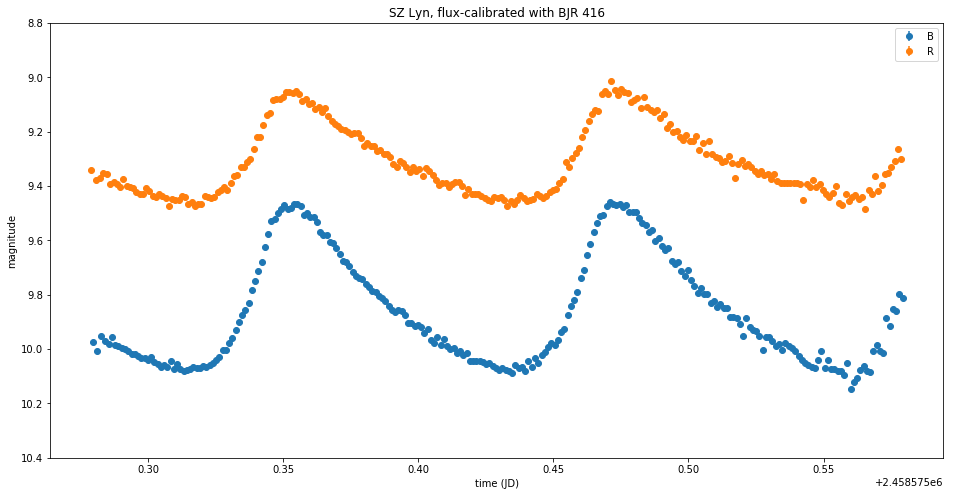

In [7]:
bjr_416_xy = (320,620)
bjr_416_width = 150

bjr_416_mag_B = 11.845
bjr_416_mag_R = 11.222

sz_lyn_bjr_416_B, sz_lyn_bjr_416_up_B, sz_lyn_bjr_416_down_B = flux_cal(sci_names_B, mbias, mflat_B, bjr_416_xy, bjr_416_width, p_range, sz_lyn_s_B, sz_lyn_n_B, bjr_416_mag_B)
sz_lyn_bjr_416_R, sz_lyn_bjr_416_up_R, sz_lyn_bjr_416_down_R = flux_cal(sci_names_R, mbias, mflat_R, bjr_416_xy, bjr_416_width, p_range, sz_lyn_s_R, sz_lyn_n_R, bjr_416_mag_R)

plot_time_series(jd_B, sz_lyn_bjr_416_B, err=[sz_lyn_bjr_416_down_B,sz_lyn_bjr_416_up_B], xlabel='time (JD)', ylabel='magnitude', title='SZ Lyn, flux-calibrated with BJR 416', label='B')
plot_time_series(jd_R, sz_lyn_bjr_416_R, err=[sz_lyn_bjr_416_down_R,sz_lyn_bjr_416_up_R], label='R', new=False)
plt.ylim(10.4, 8.8)
plt.legend()
plt.show()

Flux-calibrate with BJR 415:

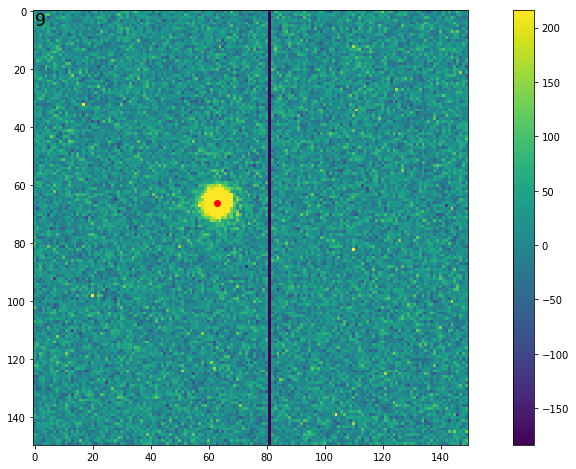

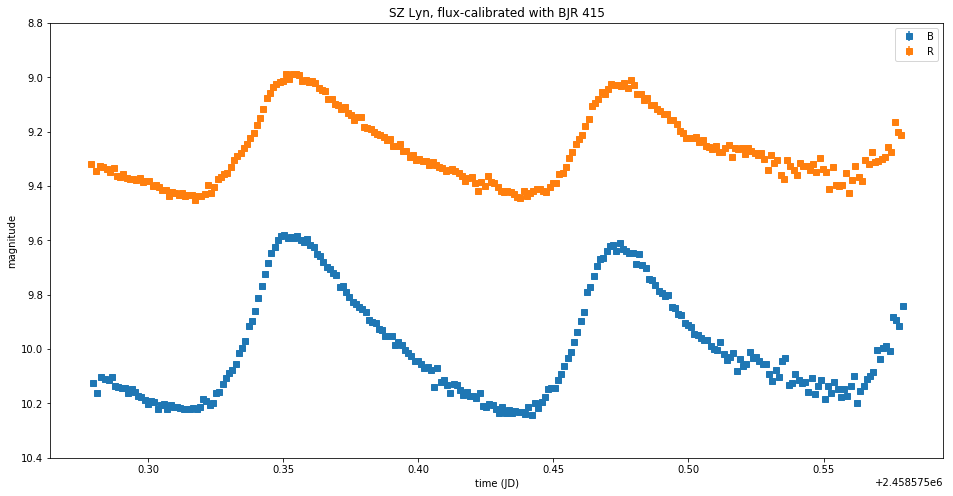

In [8]:
bjr_415_xy = (530,1100)
bjr_415_width = 150

bjr_415_mag_B = 11.701
bjr_415_mag_R = 10.481

sz_lyn_bjr_415_B, sz_lyn_bjr_415_up_B, sz_lyn_bjr_415_down_B = flux_cal(sci_names_B, mbias, mflat_B, bjr_415_xy, bjr_415_width, p_range, sz_lyn_s_B, sz_lyn_n_B, bjr_415_mag_B)
sz_lyn_bjr_415_R, sz_lyn_bjr_415_up_R, sz_lyn_bjr_415_down_R = flux_cal(sci_names_R, mbias, mflat_R, bjr_415_xy, bjr_415_width, p_range, sz_lyn_s_R, sz_lyn_n_R, bjr_415_mag_R)

plot_time_series(jd_B, sz_lyn_bjr_415_B, err=[sz_lyn_bjr_415_down_B,sz_lyn_bjr_415_up_B], xlabel='time (JD)', ylabel='magnitude', title='SZ Lyn, flux-calibrated with BJR 415', label='B', fmt='s')
plot_time_series(jd_R, sz_lyn_bjr_415_R, err=[sz_lyn_bjr_415_down_R,sz_lyn_bjr_415_up_R], label='R', fmt='s', new=False)
plt.ylim(10.4, 8.8)
plt.legend()
plt.show()

Flux-calibrate with BJR 417:

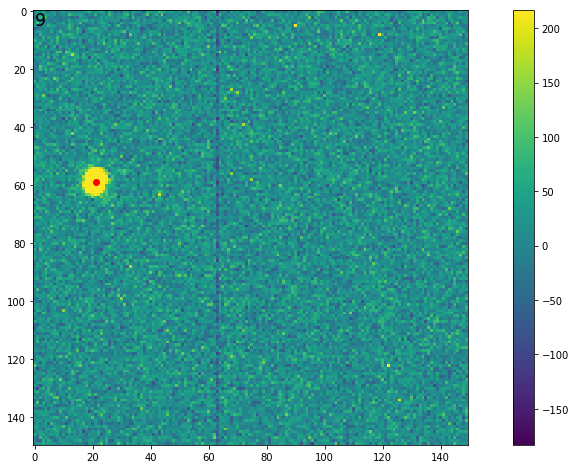

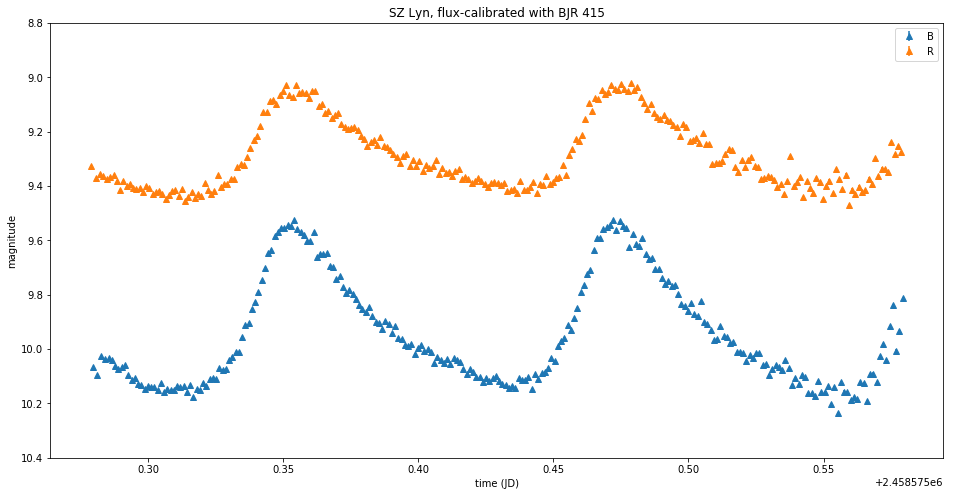

In [9]:
bjr_417_xy = (150,850)
bjr_417_width = 150

bjr_417_mag_B = 12.689
bjr_417_mag_R = 11.743

sz_lyn_bjr_417_B, sz_lyn_bjr_417_up_B, sz_lyn_bjr_417_down_B = flux_cal(sci_names_B, mbias, mflat_B, bjr_417_xy, bjr_417_width, p_range, sz_lyn_s_B, sz_lyn_n_B, bjr_417_mag_B)
sz_lyn_bjr_417_R, sz_lyn_bjr_417_up_R, sz_lyn_bjr_417_down_R = flux_cal(sci_names_R, mbias, mflat_R, bjr_417_xy, bjr_417_width, p_range, sz_lyn_s_R, sz_lyn_n_R, bjr_417_mag_R)

plot_time_series(jd_B, sz_lyn_bjr_417_B, err=[sz_lyn_bjr_417_down_B,sz_lyn_bjr_417_up_B], xlabel='time (JD)', ylabel='magnitude', title='SZ Lyn, flux-calibrated with BJR 415', label='B', fmt='^')
plot_time_series(jd_R, sz_lyn_bjr_417_R, err=[sz_lyn_bjr_417_down_R,sz_lyn_bjr_417_up_R], label='R', fmt='^', new=False)
plt.ylim(10.4, 8.8)
plt.legend()
plt.show()

Estimate the noise using a single reference star:

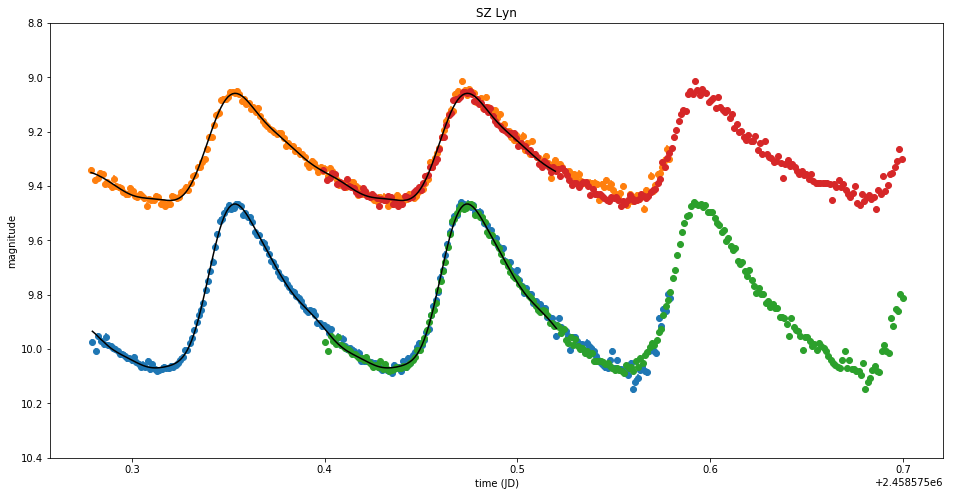

Band B: estimated rel. error = 0.00123, propagated rel. error = 0.00026
Band R: estimated rel. error = 0.00126, propagated rel. error = 0.00032


In [10]:
period = 0.12053492

sz_lyn_bjr_416_filt_B = fft_filt(sz_lyn_bjr_416_B[0:100])
sz_lyn_bjr_416_filt_R = fft_filt(sz_lyn_bjr_416_R[0:100])

sz_lyn_bjr_416_relerr_B = np.std(sz_lyn_bjr_416_B[0:100]/sz_lyn_bjr_416_filt_B)
sz_lyn_bjr_416_relerr_R = np.std(sz_lyn_bjr_416_R[0:100]/sz_lyn_bjr_416_filt_R)
sz_lyn_bjr_416_err_B = sz_lyn_bjr_416_relerr_B*sz_lyn_bjr_416_B 
sz_lyn_bjr_416_err_R = sz_lyn_bjr_416_relerr_R*sz_lyn_bjr_416_R 

plot_time_series(jd_B, sz_lyn_bjr_416_B, err=sz_lyn_bjr_416_err_B, xlabel='time (JD)', ylabel='magnitude', title='SZ Lyn', color='C0')
plot_time_series(jd_R, sz_lyn_bjr_416_R, err=sz_lyn_bjr_416_err_R, new=False, color='C1')

plot_time_series(jd_B+period, sz_lyn_bjr_416_B, new=False, color='C2')
plot_time_series(jd_R+period, sz_lyn_bjr_416_R, new=False, color='C3')

plt.plot(jd_B[0:200], np.tile(sz_lyn_bjr_416_filt_B, 2), color='black', zorder=9)
plt.plot(jd_R[0:200], np.tile(sz_lyn_bjr_416_filt_R, 2), color='black', zorder=9)

plt.ylim(10.4, 8.8)
plt.show()

print("Band B: estimated rel. error = %3.5f, propagated rel. error = %3.5f" % (sz_lyn_bjr_416_relerr_B, np.mean(sz_lyn_bjr_416_up_B/sz_lyn_bjr_416_B)))
print("Band R: estimated rel. error = %3.5f, propagated rel. error = %3.5f" % (sz_lyn_bjr_416_relerr_R, np.mean(sz_lyn_bjr_416_up_R/sz_lyn_bjr_416_R)))

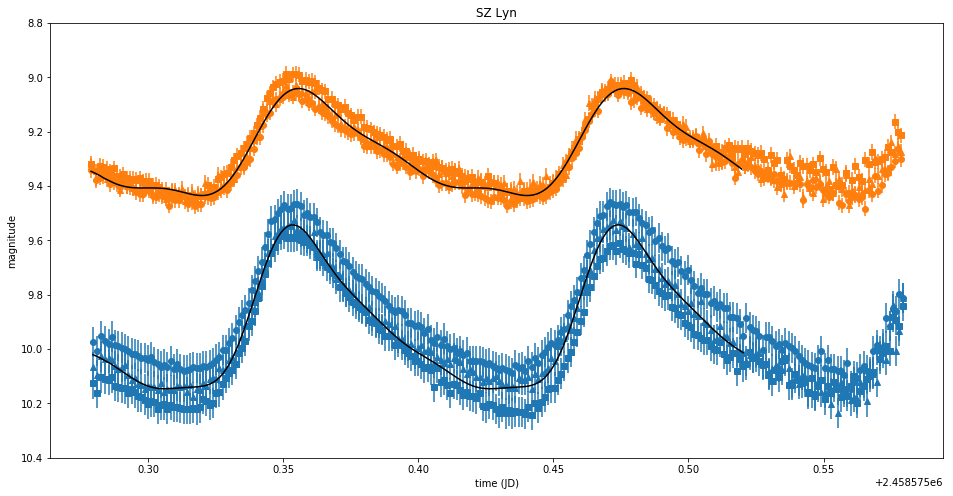

Band B: estimated rel. error = 0.00555, propagated rel. error = 0.00026 (416), 0.00026 (415), 0.00026 (417)
Band R: estimated rel. error = 0.00306, propagated rel. error = 0.00032 (416), 0.00032 (415), 0.00032 (417)


In [11]:
sz_lyn_all_B = np.vstack((sz_lyn_bjr_416_B,sz_lyn_bjr_415_B,sz_lyn_bjr_417_B))
sz_lyn_all_R = np.vstack((sz_lyn_bjr_416_R,sz_lyn_bjr_415_R,sz_lyn_bjr_417_R))

sz_lyn_med_B = np.median(sz_lyn_all_B, axis=0)
sz_lyn_med_R = np.median(sz_lyn_all_R, axis=0)

sz_lyn_filt_B = fft_filt(sz_lyn_med_B[0:100], cut=5e-7)
sz_lyn_filt_R = fft_filt(sz_lyn_med_R[0:100], cut=5e-7)

sz_lyn_relerr_B = np.std([s[0:100]/sz_lyn_filt_B for s in sz_lyn_all_B])
sz_lyn_relerr_R = np.std([s[0:100]/sz_lyn_filt_R for s in sz_lyn_all_R])
sz_lyn_err_B = sz_lyn_relerr_B*sz_lyn_med_B 
sz_lyn_err_R = sz_lyn_relerr_R*sz_lyn_med_R 

plot_time_series(jd_B, sz_lyn_bjr_416_B, err=sz_lyn_err_B, xlabel='time (JD)', ylabel='magnitude', title='SZ Lyn', color='C0')
plot_time_series(jd_R, sz_lyn_bjr_416_R, err=sz_lyn_err_R, new=False, color='C1')
plot_time_series(jd_B, sz_lyn_bjr_415_B, err=sz_lyn_err_B, new=False, color='C0', fmt='s')
plot_time_series(jd_R, sz_lyn_bjr_415_R, err=sz_lyn_err_R, new=False, color='C1', fmt='s')
plot_time_series(jd_B, sz_lyn_bjr_417_B, err=sz_lyn_err_B, new=False, color='C0', fmt='^')
plot_time_series(jd_R, sz_lyn_bjr_417_R, err=sz_lyn_err_R, new=False, color='C1', fmt='^')

plt.plot(jd_B[0:200], np.tile(sz_lyn_filt_B, 2), color='black', zorder=9)
plt.plot(jd_R[0:200], np.tile(sz_lyn_filt_R, 2), color='black', zorder=9)

plt.ylim(10.4, 8.8)
plt.show()

print("Band B: estimated rel. error = %3.5f, propagated rel. error = %3.5f (416), %3.5f (415), %3.5f (417)" 
      % (sz_lyn_relerr_B, np.mean(sz_lyn_bjr_416_up_B/sz_lyn_bjr_416_B), np.mean(sz_lyn_bjr_415_up_B/sz_lyn_bjr_415_B), np.mean(sz_lyn_bjr_417_up_B/sz_lyn_bjr_417_B)))
print("Band R: estimated rel. error = %3.5f, propagated rel. error = %3.5f (416), %3.5f (415), %3.5f (417)" 
      % (sz_lyn_relerr_R, np.mean(sz_lyn_bjr_416_up_R/sz_lyn_bjr_416_R), np.mean(sz_lyn_bjr_415_up_R/sz_lyn_bjr_415_R), np.mean(sz_lyn_bjr_417_up_R/sz_lyn_bjr_417_R)))